### Proposal #1 Horse racing dataset.  

The dataset is derieved from tips that tipsters provided to bettors.  
Tipsters are people that give bettors their best guess aka tip on how to place a bet on a horse race.  
This dataset could be used to predict horse races.


##### Topic:
Interesting Dataset;  

##### Proposal/Yellowbrick:
Classification tutorial with an unbalanced data set  

##### Notes:
This dataset is unbalanced.  Given that horse racing is a game of chance, you would expect an unbalanced target.  

#### Other:
1.  Consists of 380k tips
2.  Current features include odds, track, bet-type, horse name, and result
3.  Other features could be added to put together a successful machine learning model such as tempature, humidty, and precipitation.

![](images/horse1.png)

In [1]:
import pandas as pd
from yellowbrick.classifier.class_balance import ClassBalance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
features = ['Track', 'Horse', 'Bet Type', 'Odds', 'Result']
data = pd.read_csv("https://query.data.world/s/hGxcDSVClhoNX6KacQMHnFVNbHy9Zg",
                   encoding='latin-1')
print(data.shape)
data[features].head()

(38248, 10)


,Track,Horse,Bet Type,Odds,Result
0,Ascot,Fredricka,Win,8.00,Lose
1,Thirsk,Spend A Penny,Win,4.50,Lose
2,York,Straightothepoint,Win,7.00,Lose
3,Newmarket,Miss Inga Sock,Win,5.00,Lose
4,Ascot,Peril,Win,4.33,Win


In [3]:
# Create training and test sets
X = data.Odds.values.reshape(-1,1)
y = LabelEncoder().fit_transform(data.Result.values.ravel())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
classes = data.Result.unique()

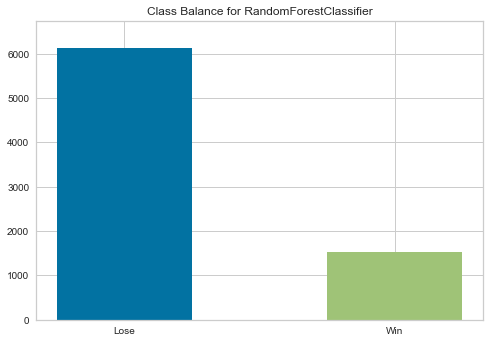

In [4]:
# Use Yellowbrick Visualizer ClassBalance
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   